In [1]:
pip install opencv-python numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


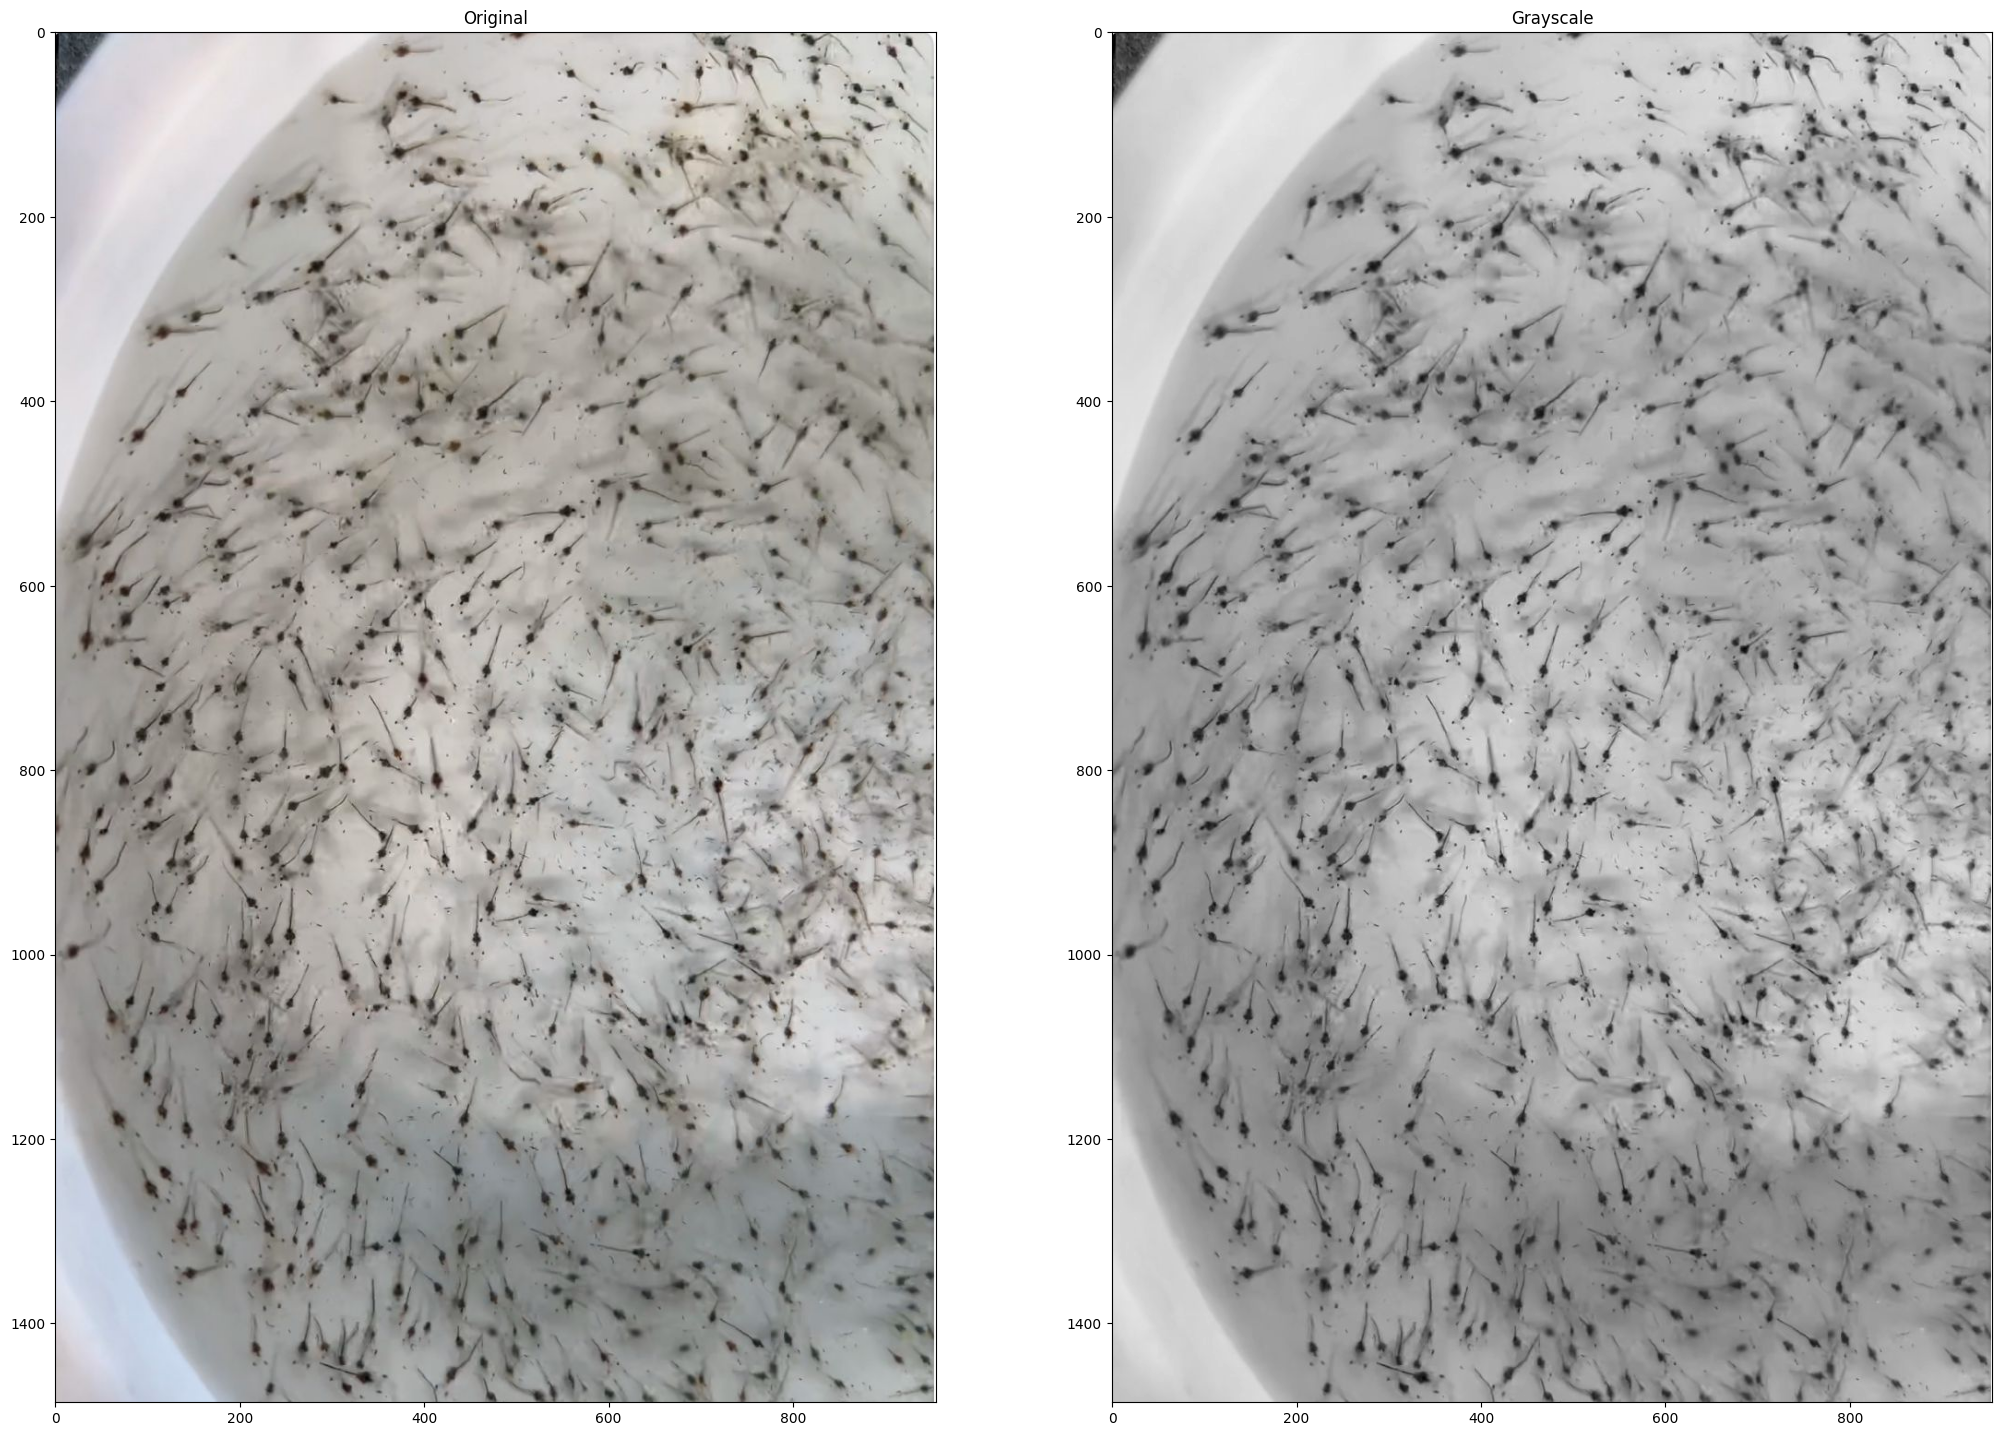

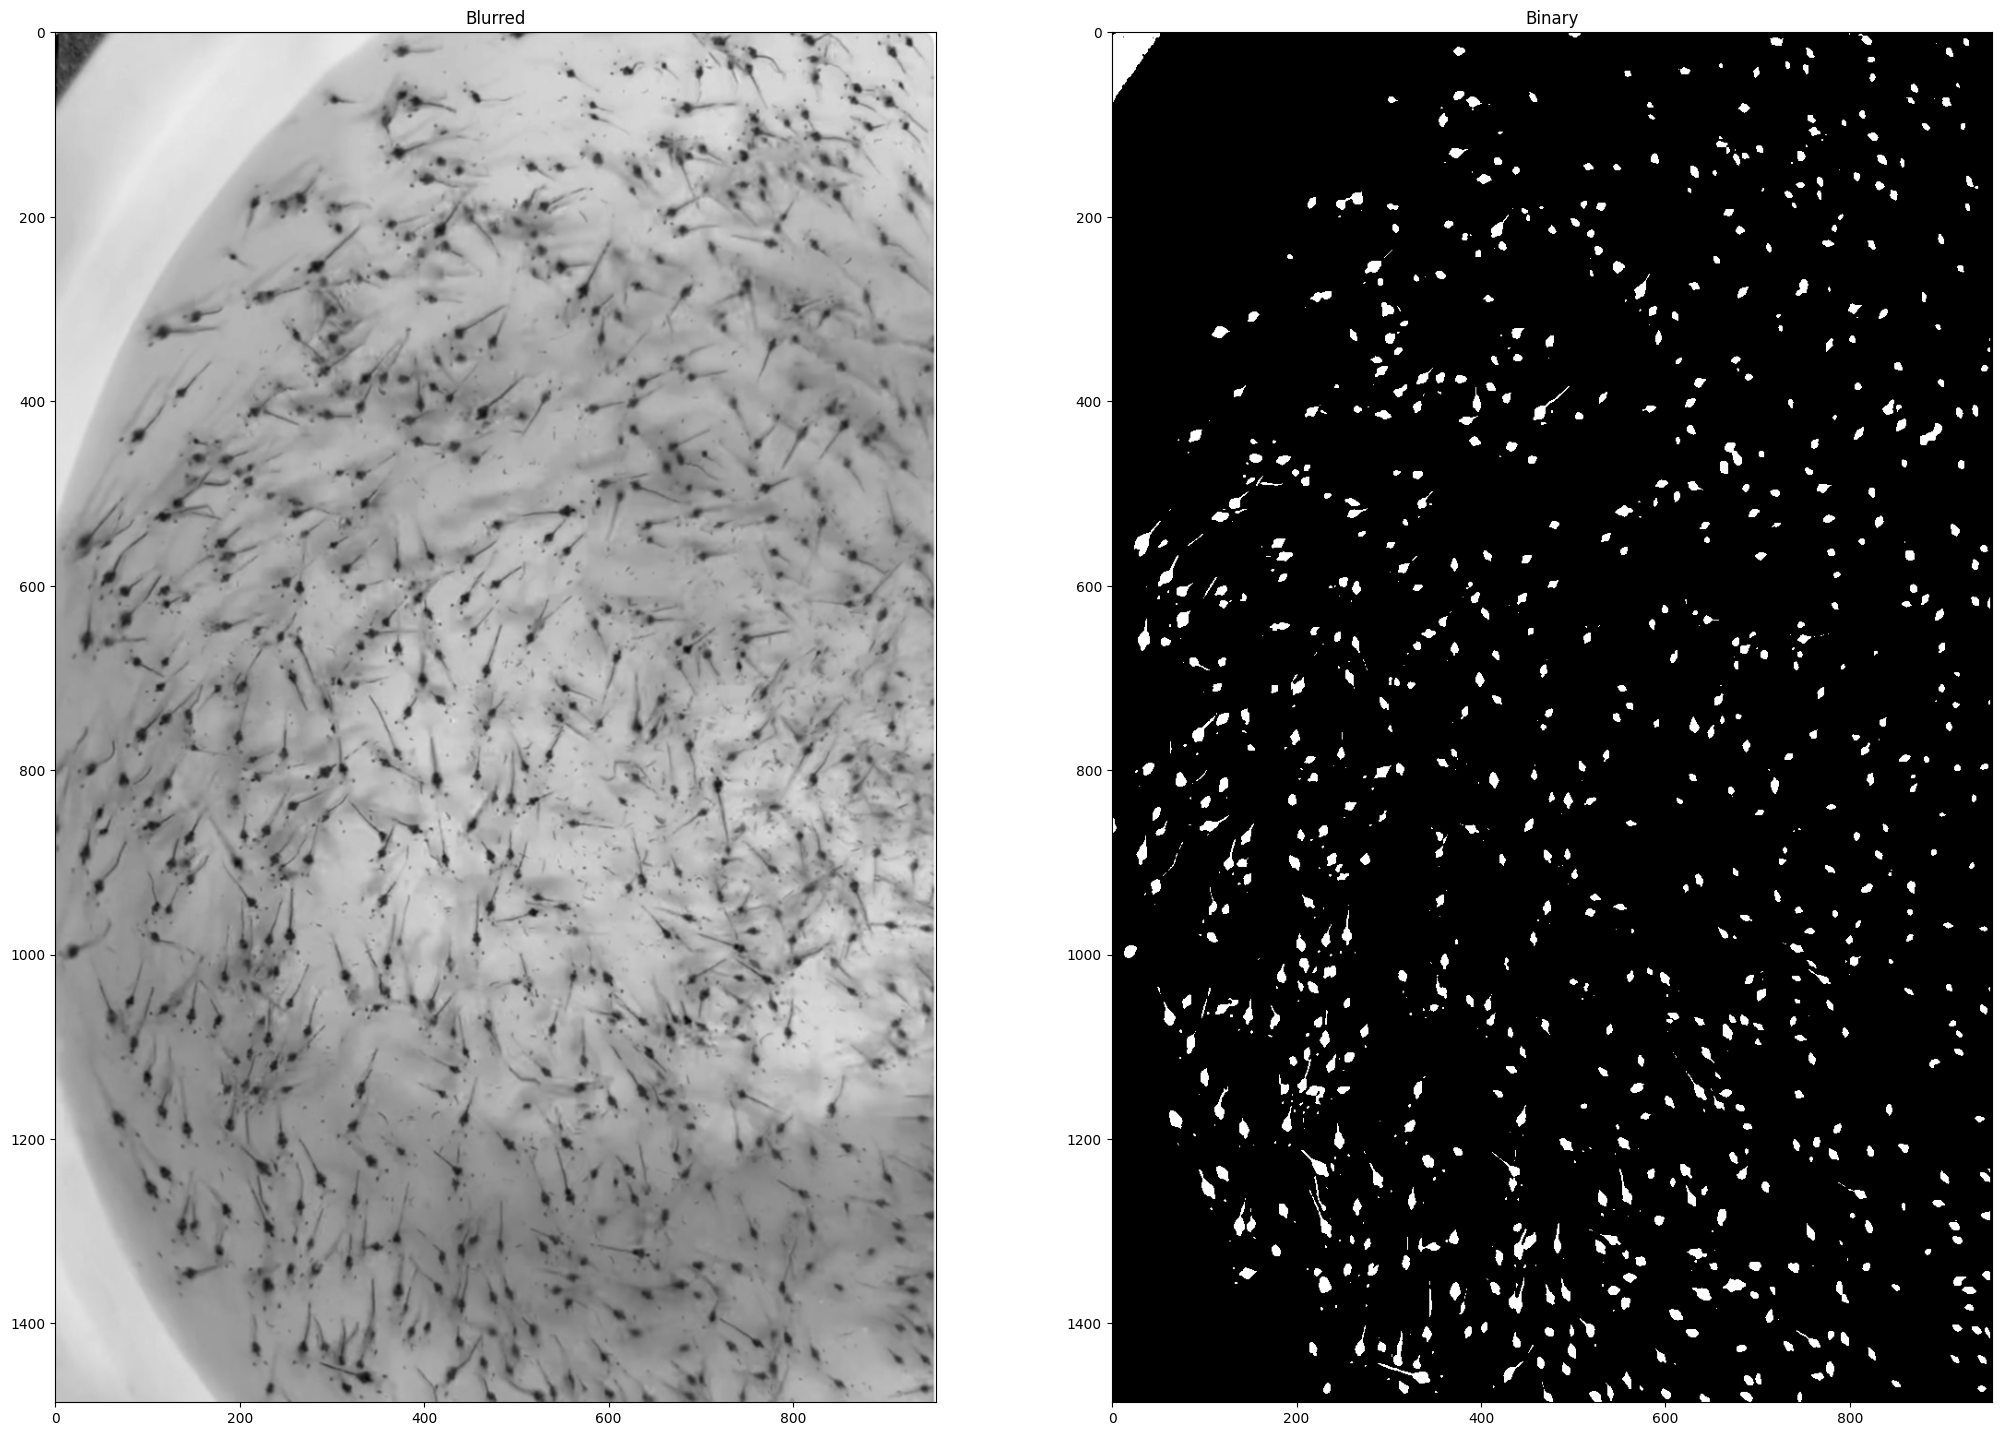

Total prawn seeds detected: 685


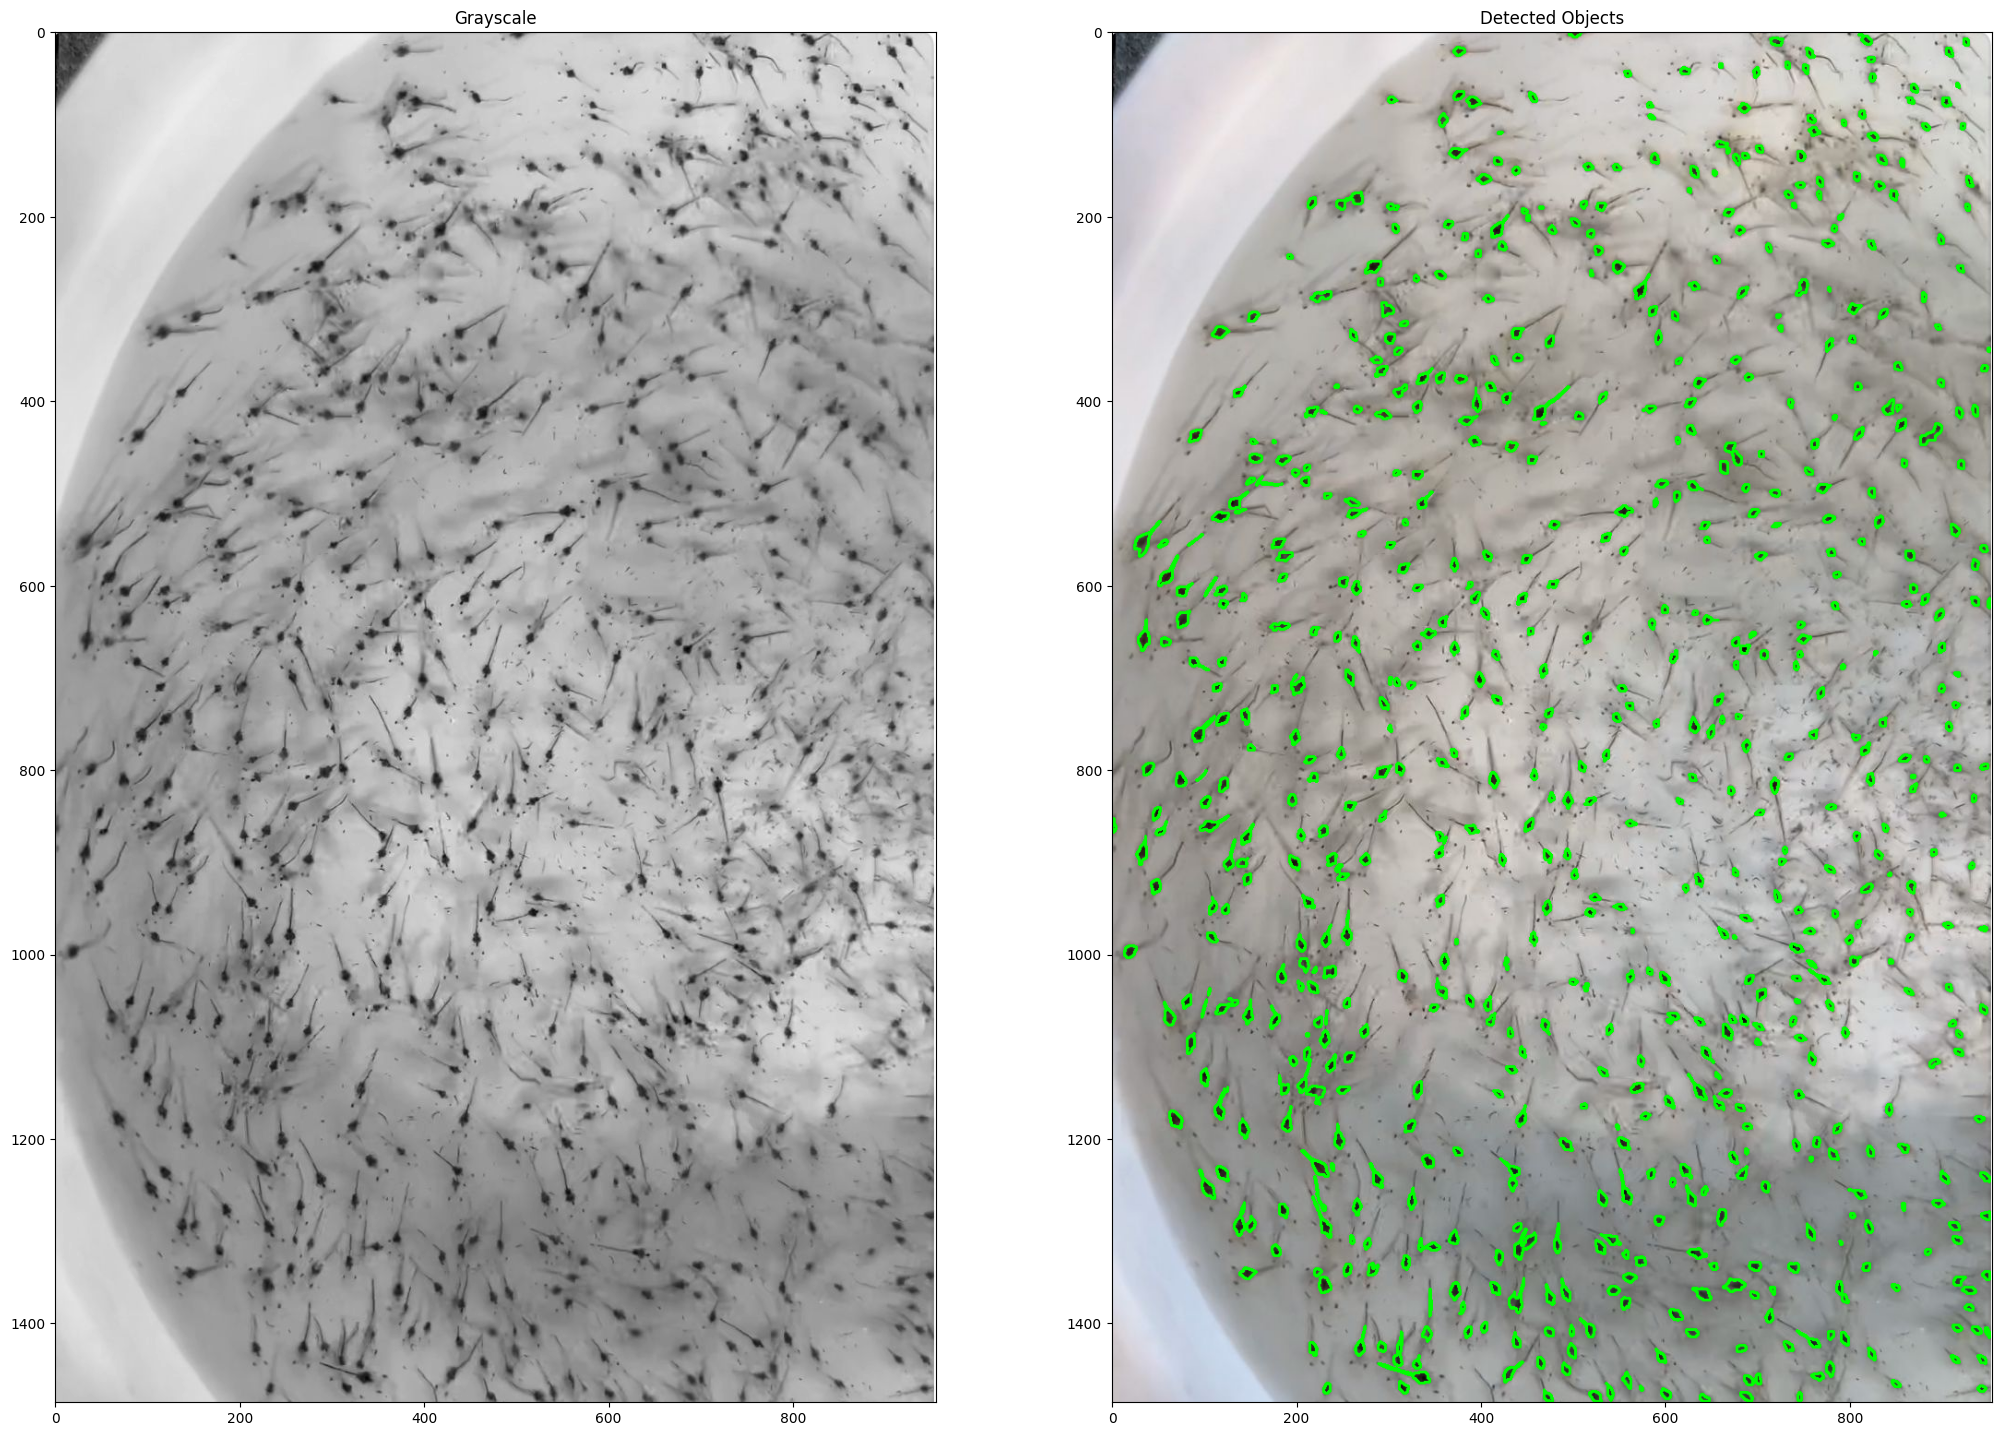

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError("Image not found or unable to load!")
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    
    # Apply thresholding (adaptive or fixed)
    _, binary = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)
    
    return image, gray, blurred ,binary

# Test preprocessing
image_path = "/kaggle/input/prawn-seed-image/WhatsApp Image 2024-12-03 at 14.29.47_460e1b4a.jpg"  # Replace with your image path
original, gray,blurred, binary = preprocess_image(image_path)

# Display the images
plt.figure(figsize=(25, 25))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB)), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(gray, cmap='gray'), plt.title("Grayscale")
plt.show()
plt.figure(figsize=(25, 25))
plt.subplot(1, 2, 1), plt.imshow(blurred, cmap='gray'), plt.title("Blurred")
plt.subplot(1, 2, 2), plt.imshow(binary, cmap='gray'), plt.title("Binary")
plt.show()

'''def apply_morphology(binary_image):
    # Define a kernel size
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    
    # Apply morphological operations
    closed = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)
    
    return opened

# Morphological operations'''
processed_binary = binary
'''#processed_binary = apply_morphology(binary)

# Display the result
plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1),plt.imshow(processed_binary, cmap='gray'),plt.title("Morphological Processing")
plt.show()
'''
def count_objects(binary_image, original_image):
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours and count objects
    count = 0
    output_image = original_image.copy()
    for contour in contours:
        if cv2.contourArea(contour) > 5 and cv2.contourArea(contour)<300:  # Filter out noise
            #print(cv2.contourArea(contour))
            count += 1
            cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)  # Draw contour
    
    return count, output_image

# Count objects
count, result_image = count_objects(processed_binary, original)

# Display the results
print(f"Total prawn seeds detected: {count}")
plt.figure(figsize=(25, 25))
plt.subplot(1, 2, 1), plt.imshow(gray, cmap='gray'), plt.title("Grayscale")
plt.subplot(1, 2, 2),plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)),plt.title("Detected Objects")
plt.show()
